Spam or Ham: Implementing a Naive Bayes spam filter with scikit-learn
First we need multiple components for our pipeline from scikit-learn, which is probably the most useful and robust library for traditional machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.


In [55]:
%precision 3

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
plt.style.use("minimal")


We start by reading and deduplicating data. Deduplication refers to any technique for eliminating a dataset's redundant data (i.e., removing exacts copies).

Which results is ~0.6 % data reduction.


In [56]:
data = pd.read_csv('dat/emails.csv')

print(f'[INFO] number of documents: {data.shape[0]}')

data = data.drop_duplicates()
print(f'[INFO] number of documents after dedublication: {data.shape[0]}')  

[INFO] number of documents: 5728
[INFO] number of documents after dedublication: 5695


Extract a corpus of email texts and vectorize using raw word counts

In [57]:
corpus = data['text']
cv = CountVectorizer()


Extract model data and split 80/20 training/testing data set. The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.


In [58]:
X = cv.fit_transform(corpus.values).toarray()
y = data['spam'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)


Instantiate and call (train) the Naive Bayes classifier. In this example we use a multinomial Naive Bayes algorithm. The multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used for NLP tasks. The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.


In [59]:
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)

MultinomialNB()


Compute classification matrix. A confusion matrix (aka. error matrix) is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.


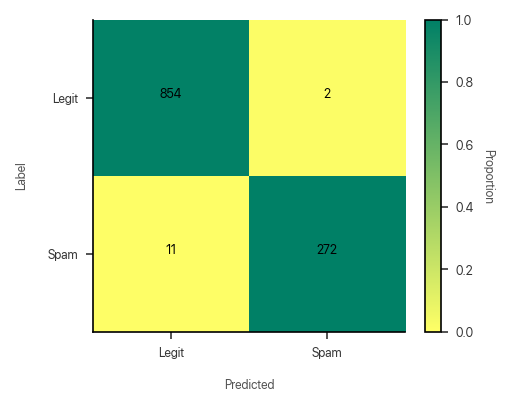

In [60]:
y_pred = classifier.predict(X_test)
cm_absolute = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, normalize="true")

plt.imshow(cm, cmap = "summer_r", vmin=0, vmax=1)
plt.grid(False)
plt.xlabel("Predicted")
plt.ylabel("Label")
plt.xticks((0, 1), ("Legit", "Spam"))
plt.yticks((0, 1), ("Legit", "Spam"))

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.annotate(cm_absolute[i, j], (i, j), ha = "center")

plt.colorbar().set_label("Proportion", rotation = 270)


Compute the classification accuracy (relative and absolute). Classification accuracy is a metric that summarizes the performance of a classification model as the number of correct predictions divided by the total number of predictions.


In [61]:
print(f'Relative Accuracy; {accuracy_score(y_test, y_pred):.1%}')
print(f'True positives {accuracy_score(y_test, y_pred, normalize=False)}')

Relative Accuracy; 98.9%
True positives 1126


Run (10-fold) cross validation (CV) and report the distribution of accuracy. Cross validation generally refers to k-fold cross validation. In k-fold cross validation you have multiple(k) train-test sets instead of 1. This basically means that in a k-fold CV you will be training your model k-times and also testing it k-times.


Compare 1-fold to 10-fold performance


In [62]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(f"mean {accuracies.mean():.1%}, sd {accuracies.std():.2f}")

KeyboardInterrupt: 


Plot the distribution of accuracies from your CV.


In [63]:
plt.hist(accuracies, density=True, range=(0.95, 1), bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Probability')
plt.xlabel('Data')
plt.tight_layout()
# plt.savefig('figs/nb_acc_dist.png')

NameError: name 'accuracies' is not defined

In [64]:
randomly_sampled_emails = data.sample(5)[["text", "spam"]]
predictions = classifier.predict(cv.transform(randomly_sampled_emails["text"].values))

result = randomly_sampled_emails.assign(prediction = predictions)
result

,text,spam,prediction
1150,Subject: first - class quality . economic pric...,1,1
1817,Subject: dr . kaminski : ? you probably won ...,0,0
2993,"Subject: re : storage book . . . hi stinson ,...",0,0
1097,Subject: limited access to sensitive paypal ac...,1,1
5195,Subject: interview with the enron research gro...,0,0


In [79]:
preds = classifier.predict(cv.transform(data["text"].values))

data[preds != data["spam"]]

,text,spam
401,Subject: nymex invitation - learn power tradin...,1
732,Subject: re [ 4 ] : terra investigate blackou...,1
1180,Subject: call for papers : the international j...,1
1411,Subject: investment to all whom it may concer...,0
1646,Subject: introducing the new iijournals online...,0
1742,Subject: bi - weekly transmission update repor...,0
1785,Subject: password security notice for passwor...,0
2113,Subject: re : billing question thank you for ...,0
2157,Subject: research family outing and volleyball...,0
2239,Subject: new research tool - too cool ! ! ! t...,0
